<a href="https://colab.research.google.com/github/juno2856/deeplearning/blob/master/review_20220421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [5]:
import sys

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(x_test.shape)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


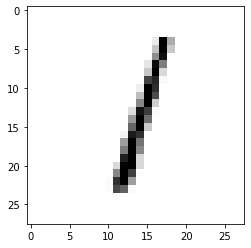

In [12]:
#plt.imshow(x_train[0], cmap = 'Greys')
plt.imshow(x_test[2], cmap = 'Greys')
plt.show()

In [6]:
for x in x_train[0]:
  for i in x:
    sys.stdout.write('%d\t' %i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [13]:
x_train = (x_train/255.0).reshape(-1, 28, 28, 1)
x_test = (x_test/255.0).reshape(-1, 28, 28, 1)

print(x_train.dtype)
print(y_test.dtype)


float64
uint8


In [14]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3,3),
                              input_shape = (28,28,1), activation = 'relu'))
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = 'accuracy')

In [16]:
if not os.path.exists('./model/'):
  os.mkdir('./model/')

In [17]:
modelpath = './model/{epoch:02d}-{val_loss:.4f}.h5'

checkpoint = keras.callbacks.ModelCheckpoint(filepath = modelpath,
                                             verbose =1, save_best_only = True)
early_stop = keras.callbacks.EarlyStopping(patience = 5)

In [18]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test),
                    epochs = 30, batch_size = 100,
                    callbacks=[checkpoint, early_stop])

Epoch 1/30
600/600 [==============================] - ETA: 0s - loss: 0.1805 - accuracy: 0.9451
Epoch 1: val_loss improved from inf to 0.05045, saving model to ./model/01-0.0504.h5
600/600 [==============================] - 140s 232ms/step - loss: 0.1805 - accuracy: 0.9451 - val_loss: 0.0504 - val_accuracy: 0.9838
Epoch 2/30
600/600 [==============================] - ETA: 0s - loss: 0.0608 - accuracy: 0.9822
Epoch 2: val_loss improved from 0.05045 to 0.03449, saving model to ./model/02-0.0345.h5
600/600 [==============================] - 139s 232ms/step - loss: 0.0608 - accuracy: 0.9822 - val_loss: 0.0345 - val_accuracy: 0.9878
Epoch 3/30
600/600 [==============================] - ETA: 0s - loss: 0.0400 - accuracy: 0.9873
Epoch 3: val_loss improved from 0.03449 to 0.03137, saving model to ./model/03-0.0314.h5
600/600 [==============================] - 138s 231ms/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0314 - val_accuracy: 0.9897
Epoch 4/30
600/600 [========================